In [56]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
import keras.backend as K


In [57]:
from keras.datasets import cifar10

In [58]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [59]:
X_train.shape

(50000, 32, 32, 3)

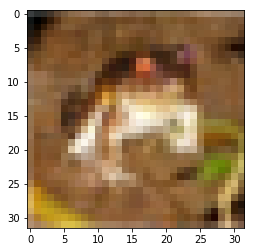

In [60]:
plt.imshow(X_train[0])

In [61]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [62]:
y_train_cat.shape

(50000, 10)

In [63]:
y_test.shape

(10000, 1)

In [64]:
from keras.layers import MaxPool2D, AvgPool2D
from keras.layers import Flatten, Activation
from keras.layers import Conv2D

from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K

In [65]:
K.clear_session()
model = Sequential()
model.add(Conv2D(32,(3, 3),activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(32,(3, 3),activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64,(3, 3), activation='relu'))
model.add(Conv2D(64,(3, 3), activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop', 
              metrics=['accuracy'])

In [66]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
__________

In [67]:
h = model.fit(X_train, y_train_cat, batch_size=128,
          epochs=10, verbose=1, validation_split=0.3)

Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 [==============================] - 163s - loss: 1.8088 - acc: 0.3465 - val_loss: 1.5582 - val_acc: 0.4433
Epoch 2/10
35000/35000 [==============================] - 158s - loss: 1.3630 - acc: 0.5166 - val_loss: 1.2270 - val_acc: 0.5601
Epoch 3/10
35000/35000 [==============================] - 159s - loss: 1.1220 - acc: 0.6077 - val_loss: 1.1592 - val_acc: 0.5930
Epoch 4/10
35000/35000 [==============================] - 159s - loss: 0.9546 - acc: 0.6669 - val_loss: 1.0421 - val_acc: 0.6451
Epoch 5/10
35000/35000 [==============================] - 159s - loss: 0.8166 - acc: 0.7172 - val_loss: 0.9091 - val_acc: 0.6927
Epoch 6/10
35000/35000 [==============================] - 158s - loss: 0.6966 - acc: 0.7603 - val_loss: 0.8810 - val_acc: 0.6975
Epoch 7/10
35000/35000 [==============================] - 159s - loss: 0.5831 - acc: 0.7995 - val_loss: 0.9728 - val_acc: 0.6864
Epoch 8/10
35000/35000 [=======================

In [68]:
test_acc = model.evaluate(X_test, y_test_cat)

10000/10000 [==============================] - 13s    


In [69]:
test_acc

[1.0599194327354431, 0.71599999999999997]

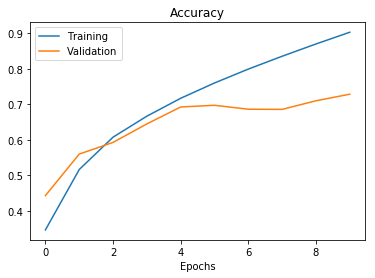

In [70]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])

plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')